# Algoritmos del camino más corto

Realice lo siguiente:

  * Programe el algoritmo de dijkstra para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

{'A': 0, 'D': 2, 'F': 5, 'E': 6, 'C': 7, 'B': 8}
{'B': 0, 'F': 1, 'A': 2, 'E': 2, 'C': 3, 'D': 4}
{'C': 0, 'B': 1, 'F': 2, 'A': 3, 'E': 3, 'D': 5}
{'D': 0, 'A': 5, 'B': 7, 'F': 8, 'E': 9, 'C': 10}
{'E': 0, 'F': 1, 'C': 3, 'B': 4, 'A': 6, 'D': 6}
{'F': 0, 'E': 1, 'C': 2, 'B': 3, 'A': 5, 'D': 7}


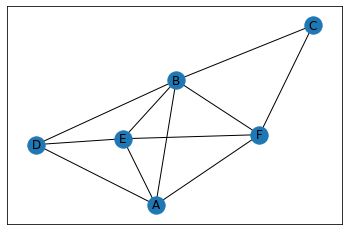

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
def dijkstra(nodes,distances):
    for let in nodes:
        sinvis = {node: None for node in nodes}
        visited = {}
        lista = let
        dis = 0
        sinvis[lista] = dis
        while True:
            for v, distance in distances[lista].items():
                if v not in sinvis:
                    continue
                nva = dis + distance
                if sinvis[v] is None or sinvis[v] > nva:
                    sinvis[v] = nva
            visited[lista] = dis
            del sinvis[lista]
            if not sinvis:
                break
            candidates = [node for node in sinvis.items() if node[1]]
            lista, dis = sorted(candidates, key = lambda x: x[1])[0]
        print(visited)

def GetGraph(adjlist):
    Grafo = nx.Graph()
    for k,v in adjlist.items():
        Grafo.add_node(k)
        for i in v:
            Grafo.add_edge(k, i)
    pos=nx.spring_layout(Grafo) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(Grafo,pos)
    labels = nx.get_edge_attributes(Grafo,'weight')
    nx.draw_networkx_edge_labels(Grafo,pos,edge_labels=labels,)
    
nodes = ("A", "B", "C", "D", "E", "F")
distances = {
    "A": {"D": 2, "F": 5},
    "B": {"A": 2, "C": 10, "F": 1, "E" :3},
    "C": {"B": 1, "F": 6},
    "D": {"A": 5, "B": 7},
    "E": {"F": 1, "A": 7, "D": 6},
    "F": {"A": 5, "C": 2, "E": 1}}
dijkstra(nodes,distances)
g = GetGraph(distances)
 

Realice lo siguiente:

  * Programe el algoritmo de Bellman-End-Ford para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

0 -> 0
1 -> -1
2 -> -1
3 -> -2
4 -> 1


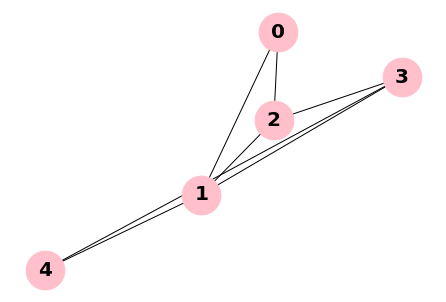

In [116]:
import networkx as nx
vertices = 5
nodos =[1,2,3,4]
grafo = []
grafo.append([0,1,-1])
grafo.append([0,2,4])
grafo.append([1,2,3])
grafo.append([1,3,2])
grafo.append([1,4,2])
grafo.append([3,2,1])
grafo.append([3,1,1])
grafo.append([4,3,-3])
#print(grafo)
dist = [float("inf")] * 5
dist[0] = 0
for _ in range(vertices - 1):
    for u, v, w in grafo:
        if dist[u] != float("Inf") and dist[u] + w < dist[v]:
            dist[v] = dist[u] + w
for u,v,w in grafo:
    if dist[u] != float("Inf") and dist[u] + w < dist[v]:
        print("Contiene tamaño en negativo")
for i in range(vertices):
    print(i, "->", dist[i])
G = nx.Graph()    
G.add_nodes_from(nodos)
G.add_weighted_edges_from(grafo)
nx.draw(G, with_labels=True, font_weight='bold', node_size=1500, node_color='pink', font_size=20)

Realice lo siguiente:

  * Programe el algoritmo de Warshal-Floyd para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

{('A', 'B'): Text(-0.2960928113706127, 0.19370314631654606, '6'),
 ('A', 'C'): Text(0.09816037610170965, 0.28039340260122053, '2'),
 ('A', 'E'): Text(0.19052979486264982, 0.6155321216923182, '7'),
 ('B', 'C'): Text(-0.03325773632317866, -0.11553212169231895, '4'),
 ('B', 'D'): Text(-0.3710275204372217, -0.6011111889884967, '5'),
 ('C', 'D'): Text(0.023225667035100678, -0.5144209327038223, '2'),
 ('C', 'E'): Text(0.45336486991008385, 0.3062968536834533, '9')}

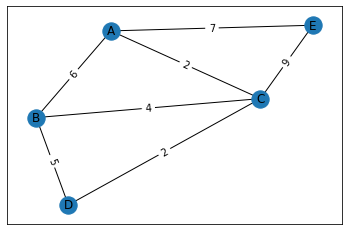

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def Dis(MetWar):
    n = len(MetWar)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                '''data.iloc[<filas>, <columnas>]'''
                MetWar.iloc[i, j] = min(MetWar.iloc[i, j], MetWar.iloc[i, k] + MetWar.iloc[k, j])
    return MetWar                   
def Rec(MetWar, vertices):
    n = len(MetWar)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                '''data.iloc[<filas>, <columnas>]'''
                if  MetWar.iloc[i,j] > MetWar.iloc[i,k] + MetWar.iloc[k,j]:
                    MetWar.iloc[i,j] = MetWar.iloc[i,k] +MetWar.iloc[k,j]
                    vertices.iloc[i,j] = MetWar.columns[k]
    return vertices

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edge('A','B', weight=6)
G.add_edge('A','C', weight=2)
G.add_edge('A','E', weight=7)
G.add_edge('B','C', weight=4)
G.add_edge('B','D', weight=5)
G.add_edge('C','A', weight=2)
G.add_edge('C','D', weight=2)
G.add_edge('E','C', weight=9)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,)

# Distancia

In [34]:
Grafo = nx.to_pandas_adjacency(G, nonedge=float('inf'))
for i in range(len(Grafo)):
    Grafo.iloc[i, i] = 0
distancia = Dis(Grafo)
print("Distancia del grafo: \n")
print(distancia, "\n")

Distancia del grafo: 

     A     B    C     D     E
A  0.0   6.0  2.0   4.0   7.0
B  6.0   0.0  4.0   5.0  13.0
C  2.0   4.0  0.0   2.0   9.0
D  4.0   5.0  2.0   0.0  11.0
E  7.0  13.0  9.0  11.0   0.0 



# Recorrido

In [35]:
MetWarR = nx.to_pandas_adjacency(G, nonedge=float('inf'))
for i in range(len(MetWarR)):
    MetWarR.iloc[i, i] = 0
    
df1 = df = pd.DataFrame(columns=['0','1','2','3','4'], index=['0','1','2','3','4'])
df1.loc['0'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['1'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['2'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['3'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['4'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})

#print(df1, "\n")
recorrido = Rec(MetWarR,df1)
print("Recorrido del grafo: \n",recorrido)

Recorrido del grafo: 
    0  1  2  3  4
0  A  B  C  C  D
1  A  B  C  E  A
2  A  B  C  E  D
3  C  B  C  E  C
4  A  A  C  C  D
